# KNN

## Glass

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("Glass.csv")
df=pd.DataFrame(data)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [117]:
df.shape

(214, 10)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [119]:
x=df.iloc[:,0:9]
y=df["Type"]

In [120]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [121]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

## checking data distribution

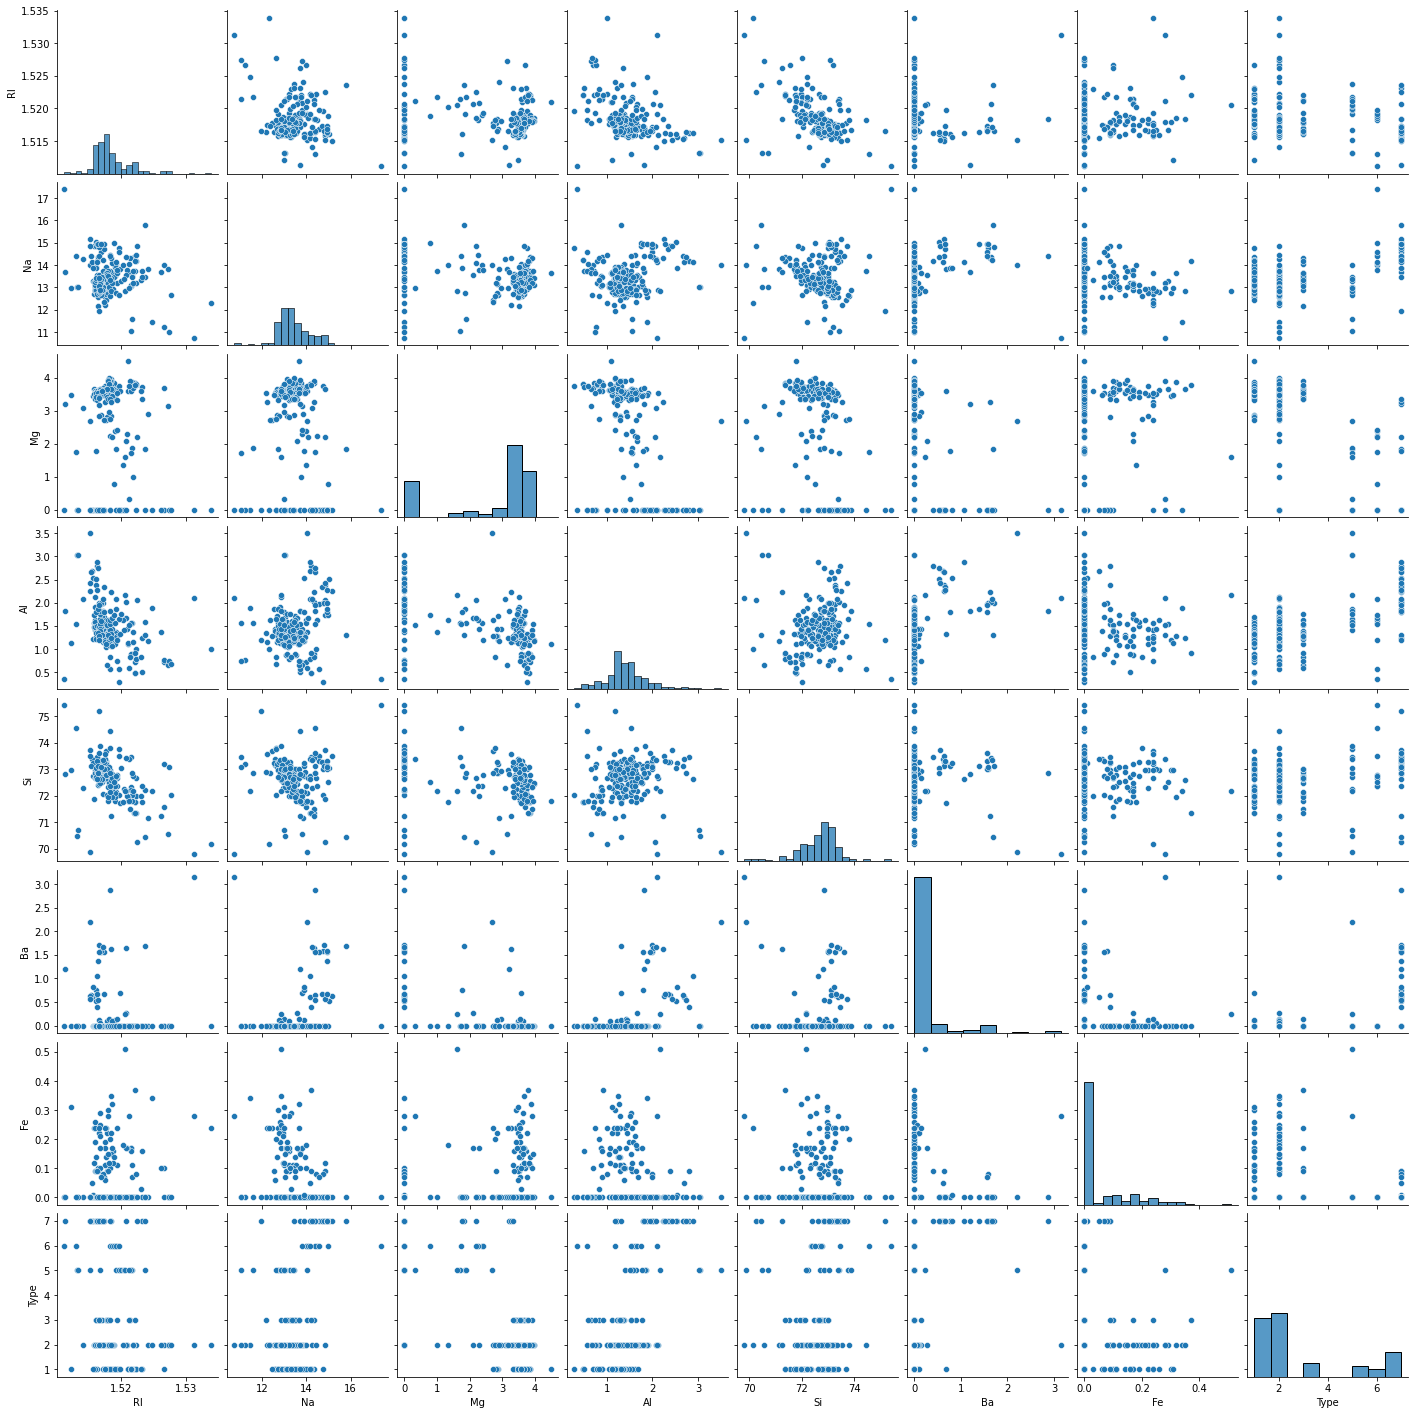

In [92]:
sns.pairplot(df)

In [122]:
scaler=StandardScaler()
scaler_x=scaler.fit_transform(x)

### converting data into train and test split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

In [124]:
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.0,0.15
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.0,0.00
29,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.0,0.00
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.0,0.00
84,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.0,0.00


In [125]:
y_train.head()

133    2
172    5
29     1
137    2
84     2
Name: Type, dtype: int64

## Model Fitting

In [126]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
y_pred=knn_model.predict(x_test)
print("Accuracy=",(accuracy_score(y_test,y_pred)))

Accuracy= 0.6976744186046512


In [128]:
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [129]:
y_pred=knn_model.predict(x_test)
print("Accuracy=",(accuracy_score(y_test,y_pred)))

Accuracy= 0.6046511627906976


In [130]:
neighbors=list(range(1,50))
cv_scores=[]

for i in neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(estimator=knn_model,X=scaler_x,y=y,cv=10)
    cv_scores.append(cv_score.mean())
    

In [131]:
cv_scores

[0.6582251082251082,
 0.6956709956709958,
 0.691125541125541,
 0.6584415584415585,
 0.6632034632034632,
 0.6534632034632035,
 0.6257575757575757,
 0.635064935064935,
 0.620995670995671,
 0.6305194805194805,
 0.6162337662337661,
 0.6212121212121211,
 0.6023809523809524,
 0.6164502164502164,
 0.5928571428571429,
 0.5978354978354978,
 0.5837662337662338,
 0.5744588744588743,
 0.5932900432900434,
 0.5937229437229438,
 0.5844155844155845,
 0.5703463203463204,
 0.5655844155844155,
 0.5844155844155844,
 0.5796536796536796,
 0.5751082251082251,
 0.583982683982684,
 0.5748917748917748,
 0.5794372294372295,
 0.5651515151515152,
 0.5701298701298702,
 0.5558441558441559,
 0.5608225108225107,
 0.5885281385281386,
 0.5885281385281386,
 0.5699134199134199,
 0.5837662337662337,
 0.5883116883116882,
 0.579004329004329,
 0.5839826839826838,
 0.5841991341991342,
 0.5651515151515152,
 0.5837662337662336,
 0.5744588744588743,
 0.5837662337662338,
 0.5608225108225107,
 0.5701298701298702,
 0.556493506493506

In [132]:
neighbors[cv_scores.index(max(cv_scores))]

2

## picking k=3 gives hieghest accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

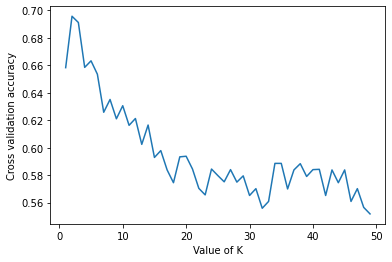

In [136]:
plt.plot(neighbors,cv_scores)
plt.xlabel("Value of K")
plt.ylabel("Cross validation accuracy")
plt.show